# Классификация adware (нейронные сети)

## Описание задачи
У нас есть датасет с различными данными о сетевом трафике. Требуется по этим данным определить тип adware: это может быть одна из 5 вредоносных программ, либо же adware может быть безвредной (benign)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## Чтение данных

In [2]:
url = './data/Adware_Multiclass_Classification.csv'
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(276095, 86)

Сразу уберём Unnamed столбец, так как это просто порядковый номер записи

In [4]:
data = data_raw.drop(columns = ['Unnamed: 0'])

## Обработка категориальных признаков

In [5]:
cat_cols = [col for col in data.columns if data[col].dtype.name == "object" and col != 'Class']
cat_cols

['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

In [6]:
from sklearn import preprocessing
for col_name in cat_cols:
    data[col_name] = preprocessing.LabelEncoder().fit_transform(data[col_name])

Используем labelEncoder так как уникальных значений у этих признаков слишком много

In [7]:
class_arr = data['Class'].unique()
print(class_arr)

['BENIGN' 'ADWARE_MOBIDASH' 'ADWARE_EWIND' 'ADWARE_DOWGIN'
 'ADWARE_SHUANET' 'ADWARE_KEMOGE']


In [8]:
i = 0
for class_name in class_arr:
    data.at[data['Class'] == class_name, 'Class'] = i
    i+= 1
print(data['Class'].unique())

[0 1 2 3 4 5]


Закодировали классы целыми числами от 0 до 5
- 0 - Benign
- 1 - ADWARE_MOBIDASH
- 2 - ADWARE_EWIND
- 3 - ADWARE_DOWGIN
- 4 - ADWARE_SHUANET
- 5 - ADWARE_KEMOGE

## Нормализация

In [9]:
data_stand = data.drop(columns = ['Class'])
data_stand = data_stand.astype('float64')
data_stand = (data_stand - data_stand.mean(axis = 0)) / data_stand.std(axis = 0)
data_stand = data_stand.fillna(0.0)

## Разбитие выборки

In [10]:
X = data_stand
y = data['Class']

X = X.to_numpy()
y = np.array(y, dtype = 'int')

X.shape, y.shape

((276095, 84), (276095,))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(207071, 69024)

## 1 скрытый слой

In [12]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (80,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001,
                          verbose=True)

In [13]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 1.00555281
Iteration 2, loss = 0.84077595
Iteration 3, loss = 0.77143528
Iteration 4, loss = 0.65941970
Iteration 5, loss = 0.52673965
Iteration 6, loss = 0.41794905
Iteration 7, loss = 0.34969847
Iteration 8, loss = 0.30973553
Iteration 9, loss = 0.28493679
Iteration 10, loss = 0.26810860
Iteration 11, loss = 0.25569674
Iteration 12, loss = 0.24598913
Iteration 13, loss = 0.23827796
Iteration 14, loss = 0.23142802
Iteration 15, loss = 0.22568377
Iteration 16, loss = 0.22069304
Iteration 17, loss = 0.21625034
Iteration 18, loss = 0.21219885
Iteration 19, loss = 0.20889202
Iteration 20, loss = 0.20565557
Iteration 21, loss = 0.20274034
Iteration 22, loss = 0.20026166
Iteration 23, loss = 0.19805111
Iteration 24, loss = 0.19584875
Iteration 25, loss = 0.19416610
Iteration 26, loss = 0.19235860
Iteration 27, loss = 0.19084449
Iteration 28, loss = 0.18921008
Iteration 29, loss = 0.18795814
Iteration 30, loss = 0.18663369
Iteration 31, loss = 0.18564155
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(80,), random_state=42,
              tol=0.001, verbose=True)

In [14]:
from sklearn.metrics import accuracy_score

### Проверяем качество

In [15]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.08892559109874826
Training set error: 0.08394222271588006


In [16]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41733
           1       0.64      0.42      0.51      4929
           2       0.90      0.91      0.90      6138
           3       0.61      0.82      0.70      5742
           4       0.85      0.81      0.83      4718
           5       0.90      0.87      0.88      5764

    accuracy                           0.91     69024
   macro avg       0.82      0.80      0.80     69024
weighted avg       0.91      0.91      0.91     69024



## 2 скрытых слоя

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (80, 40),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001,
                          verbose=1)

In [18]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.92064210
Iteration 2, loss = 0.52966541
Iteration 3, loss = 0.39436566
Iteration 4, loss = 0.30648434
Iteration 5, loss = 0.25365418
Iteration 6, loss = 0.22947162
Iteration 7, loss = 0.21627214
Iteration 8, loss = 0.20751127
Iteration 9, loss = 0.20093272
Iteration 10, loss = 0.19586412
Iteration 11, loss = 0.19242974
Iteration 12, loss = 0.18772983
Iteration 13, loss = 0.18474888
Iteration 14, loss = 0.18212118
Iteration 15, loss = 0.18002139
Iteration 16, loss = 0.17790719
Iteration 17, loss = 0.17612769
Iteration 18, loss = 0.17476518
Iteration 19, loss = 0.17260763
Iteration 20, loss = 0.17131730
Iteration 21, loss = 0.17071463
Iteration 22, loss = 0.16889022
Iteration 23, loss = 0.16768678
Iteration 24, loss = 0.16755867
Iteration 25, loss = 0.16628848
Iteration 26, loss = 0.16543081
Iteration 27, loss = 0.16416839
Iteration 28, loss = 0.16398890
Iteration 29, loss = 0.16345018
Iteration 30, loss = 0.16195782
Iteration 31, loss = 0.16087722
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(80, 40),
              random_state=42, tol=0.001, verbose=1)

### Проверяем качество

In [19]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.07117814093648586
Training set error: 0.06710258800121698


In [20]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41733
           1       0.73      0.52      0.61      4929
           2       0.93      0.91      0.92      6138
           3       0.67      0.84      0.74      5742
           4       0.90      0.88      0.89      4718
           5       0.89      0.92      0.91      5764

    accuracy                           0.93     69024
   macro avg       0.85      0.84      0.84     69024
weighted avg       0.93      0.93      0.93     69024



Получили, что сеть с 2-мя скрытыми слоями даёт более точные предсказания, хоть и не очень значительно

## Подбор параметра alpha

In [21]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (80,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42, tol=0.001)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

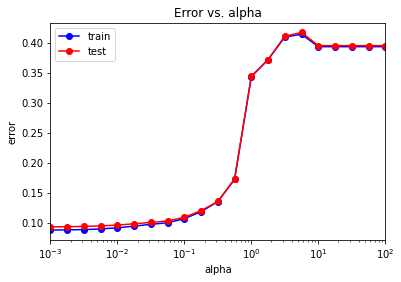

In [22]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

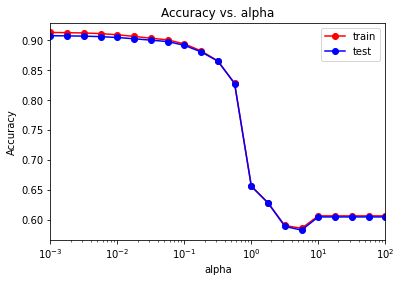

In [23]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

### Минимальная ошибка

In [24]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Minimum training set error: {}".format(min_train_err))
print("Minimum test set error: {}".format(min_test_err))

Minimum training set error: 0.08739031539906603
Minimum test set error: 0.0928227862772369


In [25]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print("Optimal alpha: {}".format(alpha_opt))

Optimal alpha: 0.001


## Подбор числа нейронов

In [26]:
neuron_arr = [num for num in range(5, 100, 5)]
test_err = []
train_err = []
train_acc = []
test_acc = []

for num in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (num,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42, tol=0.001)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

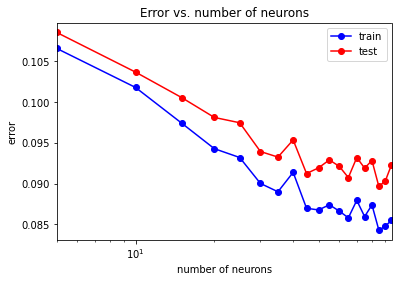

In [27]:
plt.semilogx(neuron_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()

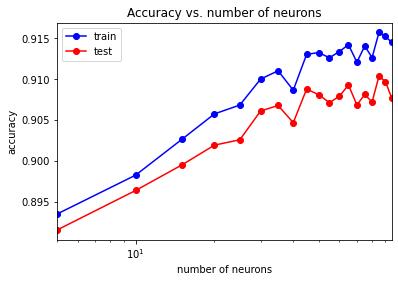

In [28]:
plt.semilogx(neuron_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.legend()

## Минимальная ошибка

In [29]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Minimum training set error: {}".format(min_train_err))
print("Minimum test set error: {}".format(min_test_err))

Minimum training set error: 0.08430441732545842
Minimum test set error: 0.08964997681965693


In [30]:
ind = test_err.index(min_test_err)
num_opt = neuron_arr[ind]
print("Optimal number of neurons: {}".format(num_opt))

Optimal number of neurons: 85


## Обучение сети с оптимальными параметрами

In [31]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (num_opt,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001
                          )

In [32]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 2min 14s, sys: 645 ms, total: 2min 14s
Wall time: 33.8 s


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(85,),
              random_state=42, tol=0.001)

In [33]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.08964997681965693
Training set error: 0.08430441732545842


In [34]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41733
           1       0.66      0.40      0.50      4929
           2       0.88      0.93      0.90      6138
           3       0.62      0.81      0.71      5742
           4       0.82      0.84      0.83      4718
           5       0.92      0.84      0.88      5764

    accuracy                           0.91     69024
   macro avg       0.81      0.80      0.80     69024
weighted avg       0.91      0.91      0.91     69024



## Матрица рассогласования

/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


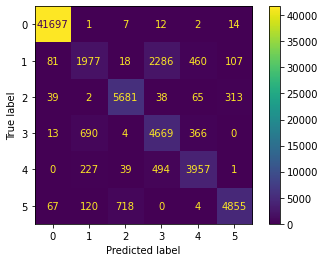

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp_model, X_test, y_test) 